In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df = pd.read_csv('C:\\Users\\chint\\Desktop\\DATA SCIENCE FILES\\MACHINE LEARNING ASSIGNMENTS\\assignment 1\\diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [101]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [102]:
df.shape

(53940, 10)

# EDA

# Univariate

Text(0.5, 0, 'carat')

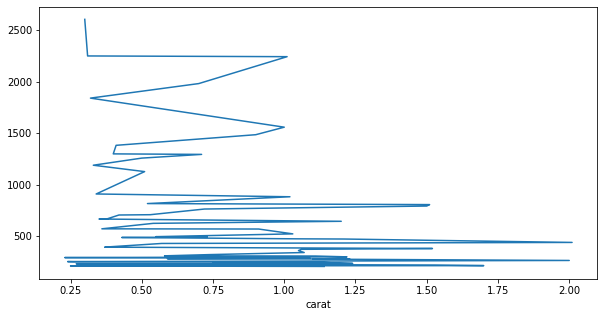

In [103]:
# carat column

plt.figure(figsize=(10,5))
df['carat'].value_counts().head(70).plot.line()
plt.xlabel('carat')


Text(0.5, 0, 'cut')

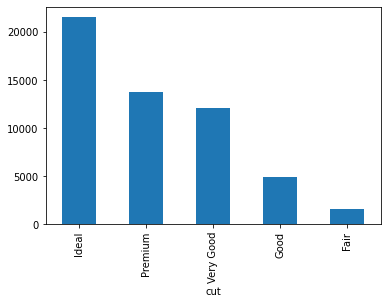

In [104]:
# cut column

df['cut'].value_counts().plot.bar()
plt.xlabel('cut')


<AxesSubplot:ylabel='color'>

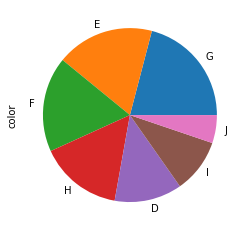

In [105]:
df['color'].value_counts().plot.pie()

Text(0.5, 0, 'clarity')

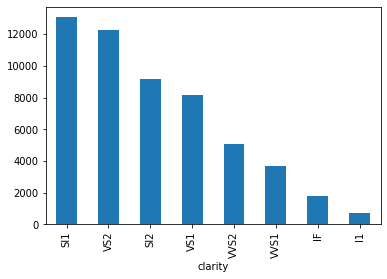

In [106]:
# clarity column

df['clarity'].value_counts().plot.bar()
plt.xlabel('clarity')

Text(0.5, 0, 'depth')

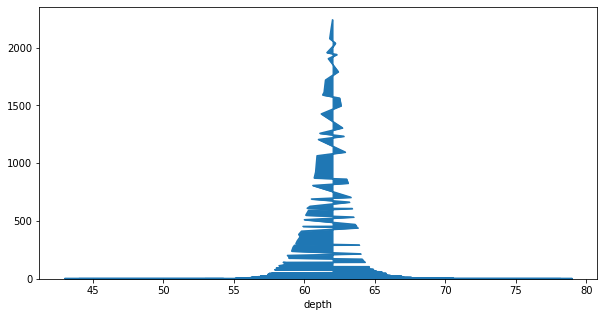

In [107]:
plt.figure(figsize=(10,5))
df['depth'].value_counts().plot.area()
plt.xlabel('depth')


C:\Users\chint\anaconda3\envs\course\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

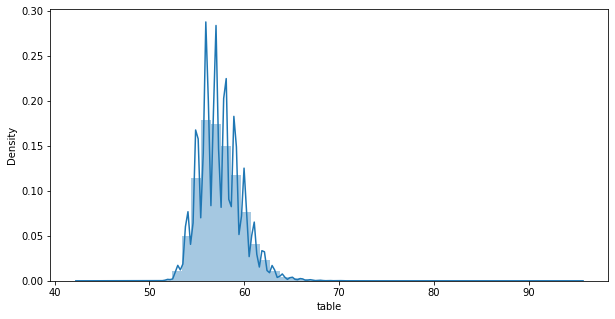

In [108]:
plt.figure(figsize=(10,5))
sns.distplot(df['table'])

Text(0.5, 0, 'price')

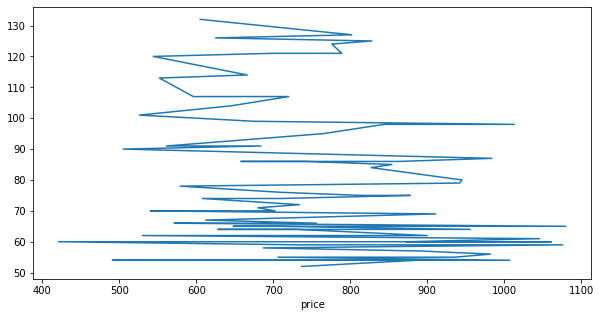

In [109]:
plt.figure(figsize=(10,5))
df['price'].value_counts().head(70).plot.line()
plt.xlabel('price')


# Bi-variate

<AxesSubplot:xlabel='cut,carat'>

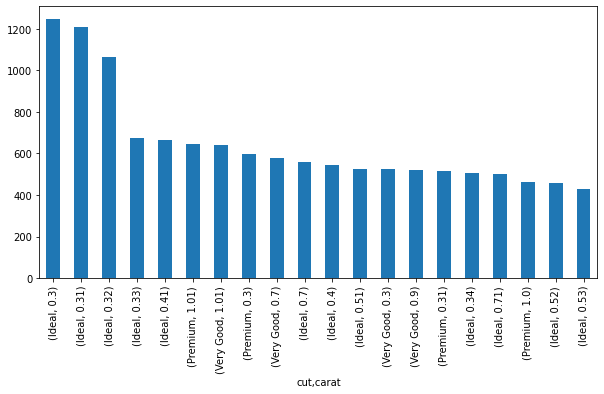

In [110]:
# cut and carat column

plt.figure(figsize=(10,5))
df[['cut','carat']].value_counts().head(20).plot.bar()

<AxesSubplot:ylabel='None'>

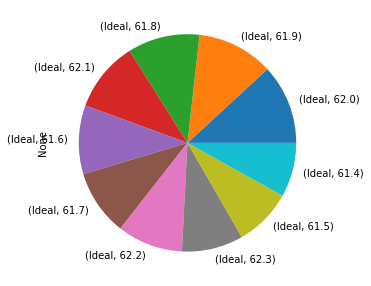

In [111]:
# cut and depth column

plt.figure(figsize=(10,5))
df[['cut','depth']].value_counts().head(10).plot.pie()

Text(0, 0.5, 'table')

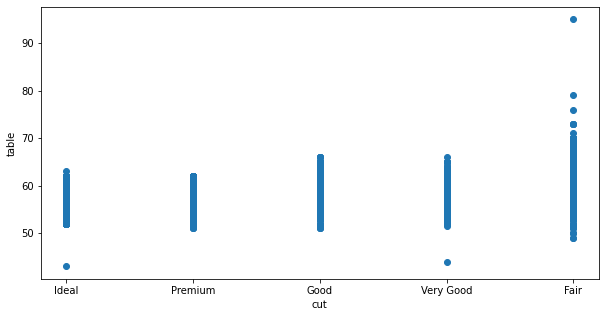

In [112]:
# cut and table column

plt.figure(figsize=(10,5))
plt.scatter(df['cut'], df['table'])
plt.xlabel('cut')
plt.ylabel('table')

<AxesSubplot:xlabel='color,carat'>

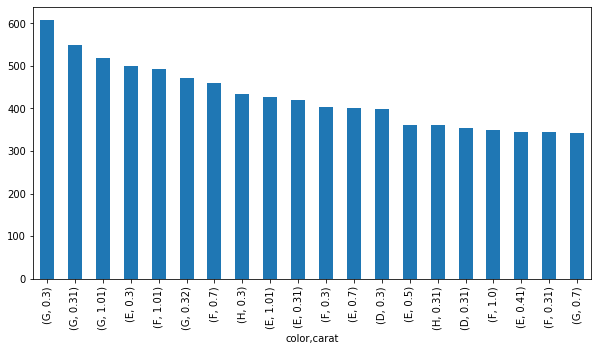

In [113]:
# color and carat column

plt.figure(figsize=(10,5))
df[['color','carat']].value_counts().head(20).plot.bar()

<AxesSubplot:ylabel='None'>

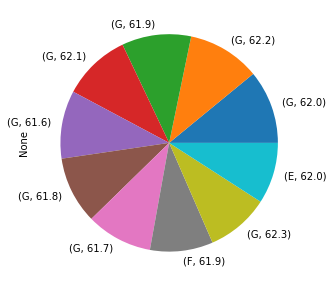

In [114]:
# color and depth column

plt.figure(figsize=(10,5))
df[['color','depth']].value_counts().head(10).plot.pie()

Text(0, 0.5, 'table')

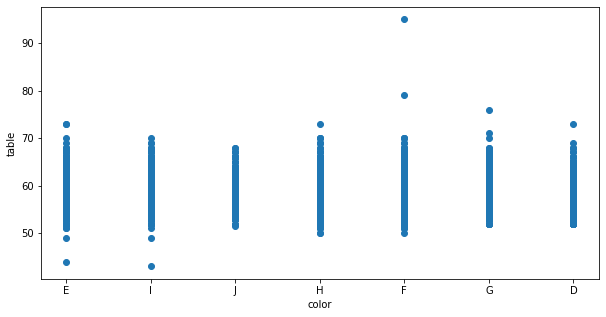

In [115]:
# color and table column

plt.figure(figsize=(10,5))
plt.scatter(df['color'], df['table'])
plt.xlabel('color')
plt.ylabel('table')

<AxesSubplot:xlabel='color,carat'>

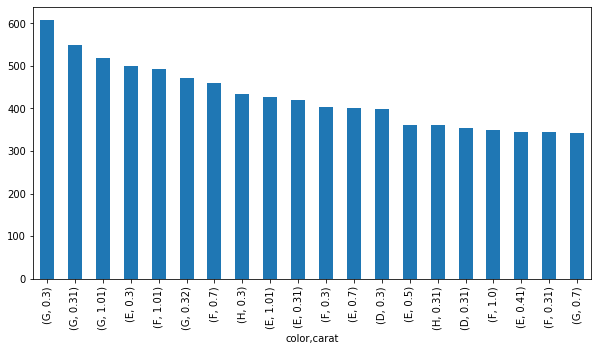

In [116]:
# clarity and carat column

plt.figure(figsize=(10,5))
df[['color','carat']].value_counts().head(20).plot.bar()

<AxesSubplot:ylabel='None'>

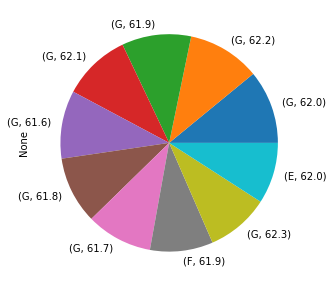

In [117]:
# clarity and depth column

plt.figure(figsize=(10,5))
df[['color','depth']].value_counts().head(10).plot.pie()

Text(0, 0.5, 'table')

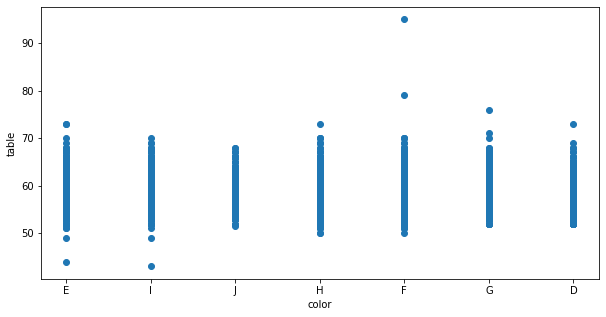

In [118]:
# clarity and table column

plt.figure(figsize=(10,5))
plt.scatter(df['color'], df['table'])
plt.xlabel('color')
plt.ylabel('table')

# treating outliers for floating numbers

In [178]:
num_col = [col for col in df.columns if df[col].dtypes == 'float64']
num_col

['carat', 'depth', 'table', 'x', 'y', 'z']

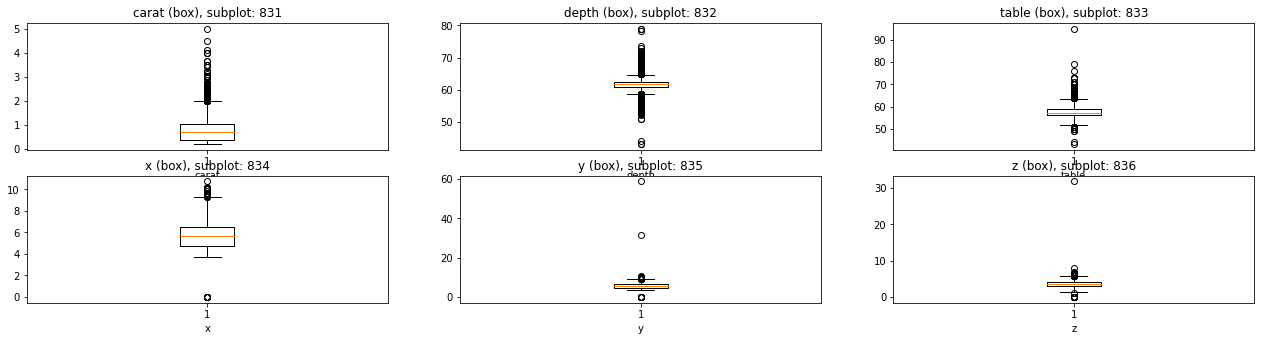

In [179]:
a = 8  # number of rows
b = 3  # number of columns
c = 1
fig = plt.figure(figsize=(22,22))
for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

In [180]:
for i in num_col:
    iqr = 1.5 * (np.percentile(df[i], 75) - np.percentile(df[i], 25))
    df.drop(df[df[i] > (iqr + np.percentile(df[i], 75))].index, inplace=True)
    df.drop(df[df[i] < (np.percentile(df[i], 25) - iqr)].index, inplace=True)
    

In [181]:
df.shape

(48898, 10)

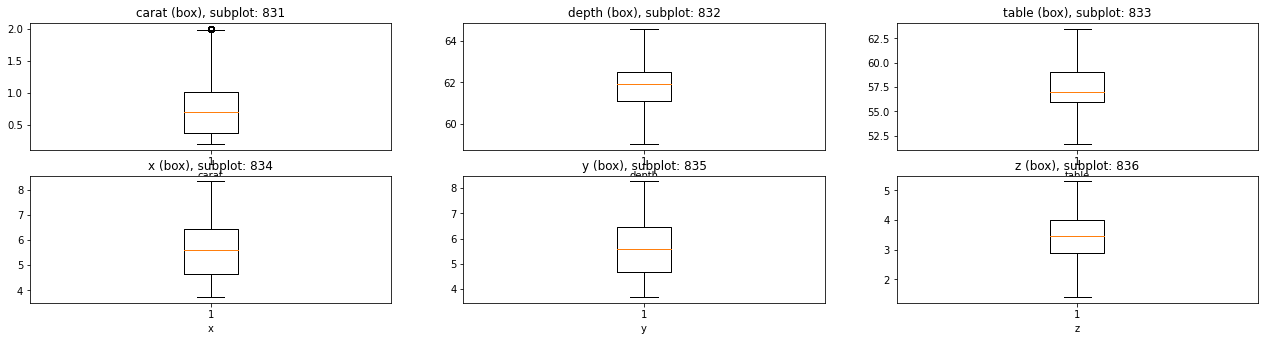

In [182]:
a = 8  # number of rows
b = 3  # number of columns
c = 1
fig = plt.figure(figsize=(22,22))
for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = df[i])
    c = c + 1

# treating outliers for integer values

{'whiskers': [<matplotlib.lines.Line2D at 0x28590321c10>,
 'caps': [<matplotlib.lines.Line2D at 0x28590330310>,
 'boxes': [<matplotlib.lines.Line2D at 0x285903218b0>],
 'medians': [<matplotlib.lines.Line2D at 0x285903309a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28590330cd0>],
 'means': []}

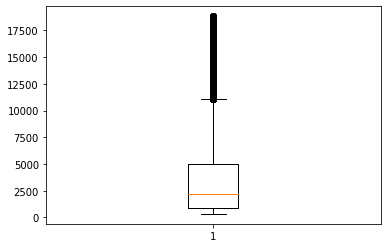

In [183]:
plt.boxplot(x = df['price'])

In [184]:
iqr = 1.5 * (np.percentile(df['price'], 75) - np.percentile(df['price'], 25))
df.drop(df[df['price'] > (iqr + np.percentile(df['price'], 75))].index, inplace=True)
df.drop(df[df['price'] < (np.percentile(df['price'], 25) - iqr)].index, inplace=True)

In [185]:
df.shape

(46530, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x285909aba00>,
 'caps': [<matplotlib.lines.Line2D at 0x2859099e100>,
 'boxes': [<matplotlib.lines.Line2D at 0x285909ab6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2859099e790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2859099eac0>],
 'means': []}

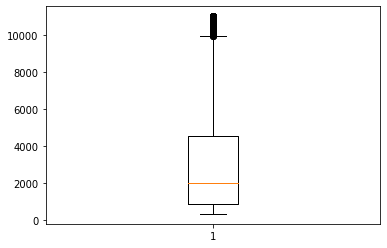

In [186]:
plt.boxplot(x = df['price'])

# OnehotEncoding/Dummies

In [187]:
categorical = df.select_dtypes(include=['object'])

categorical.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
3,Premium,I,VS2
4,Good,J,SI2
5,Very Good,J,VVS2


In [188]:
df_cat = pd.get_dummies(categorical, prefix_sep='_', drop_first=True)
df_cat.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [189]:
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48


In [190]:
# concatinating converted categorical columns and numerical columns

In [191]:
df = pd.concat([df_num,df_cat], axis=1)

df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [192]:
# we have predict price of the diamonds so we are saving price column to target variable i.e. 'y' ,
# and dropping price column in train dataset so that we train our model without price column for predicting.

In [193]:
y = df['price']
X= df.drop("price",axis=1)

# Train and split

In [194]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, \
                                                    y, \
                                                    test_size = 0.25, \
                                                   random_state = 0)

# Normalize the data

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [197]:
normalize=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
print(normalize)

          carat     depth     table     price         x         y         z  \
0      0.016667  0.446429  0.260870  0.000000  0.048458  0.065359  0.277929   
1      0.005556  0.142857  0.782609  0.000000  0.035242  0.034858  0.245232   
3      0.050000  0.607143  0.521739  0.000747  0.103524  0.119826  0.332425   
4      0.061111  0.767857  0.521739  0.000840  0.134361  0.145969  0.365123   
5      0.022222  0.678571  0.434783  0.000933  0.046256  0.061002  0.291553   
...         ...       ...       ...       ...       ...       ...       ...   
53935  0.288889  0.321429  0.434783  0.226921  0.444934  0.453159  0.569482   
53936  0.288889  0.732143  0.260870  0.226921  0.431718  0.450980  0.599455   
53937  0.277778  0.678571  0.695652  0.226921  0.425110  0.435730  0.585831   
53938  0.366667  0.357143  0.521739  0.226921  0.533040  0.531590  0.634877   
53939  0.305556  0.571429  0.260870  0.226921  0.462555  0.477124  0.607629   

       cut_Good  cut_Ideal  cut_Premium  ...  color

# using manual code

In [171]:
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)

In [172]:
knn=KNN(k=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
display(y_pred)

array([5436.        , 5183.        ,  988.        , ...,  710.        ,
       2913.33333333, 6230.33333333])

In [173]:
from sklearn import metrics
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  0.6359886034890977


In [175]:
print(metrics.r2_score(y_test, y_pred))

0.9999999390123773


# Using sklearn

In [198]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [199]:
from sklearn import metrics
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  0.6161861551548478


In [201]:
print(metrics.r2_score(y_test, y_pred))

0.9999999427511311
